# Flights Data Analysis
## by Ahmed Mokhtar

## Investigation Overview

> The overall goals are to get better understanding of our data, search for the correlation between the variables, and get the disribution of the delay variable, search for the unusual correlation and get some question to answer it. 

## Dataset Overview

> The data consists of 63290 records about flights in US. This records include date(month,year), Carrier name, Airport, arrival delay time, and the delay_reasons, and other various features such the number of flights, Cancelled flights, and the cancellation_reasons. The dataset (airline_delay_causes.csv) can be downloaded from ASA Section on Statistical Computing & ASA Section on Statistical Graphics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('airline_delay_causes.csv')

df.columns = df.columns.str.replace(' ', '')

df2017 = df[df['year']==2017]
df2018 = df[df['year']==2018]
df2019 = df[df['year']==2019]
df2020 = df[df['year']==2020]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of carrier flights per month

> This plot the distibution of carrier flights per month, and it seems to be right skewed and most of the data lays below the 500 

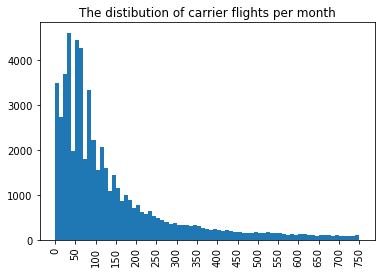

In [3]:
xbins = np.arange(0, 760, 10) 
x_ticks = np.arange(0,800,50)

plt.hist(df.arr_flights, bins=xbins); 
plt.xticks(x_ticks,x_ticks)
plt.xticks(rotation=90)

plt.title('The distibution of carrier flights per month');

## Delay time per carrier and month

> This data is normal distibuted as we shuold consider if the flights arrive early

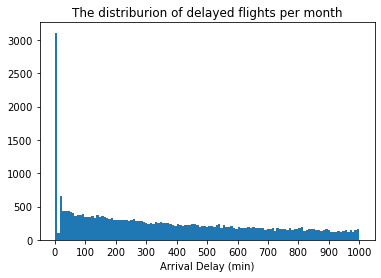

In [4]:
xbins = np.arange(0, 1008, 8) 
x_ticks = np.arange(0, 1100, 100)

plt.hist(data=df, x="arr_delay", bins=xbins)

plt.xticks(x_ticks,x_ticks)

plt.title('The distriburion of delayed flights per month')
plt.xlabel("Arrival Delay (min)");

## Total flights per year

> As we can see after June 2020 the flight stops because coronavirus, and we can see the number of flights is decreasing from April

> We can see that February has the lowest flights number

> people fly in June and August more than the rest of the year

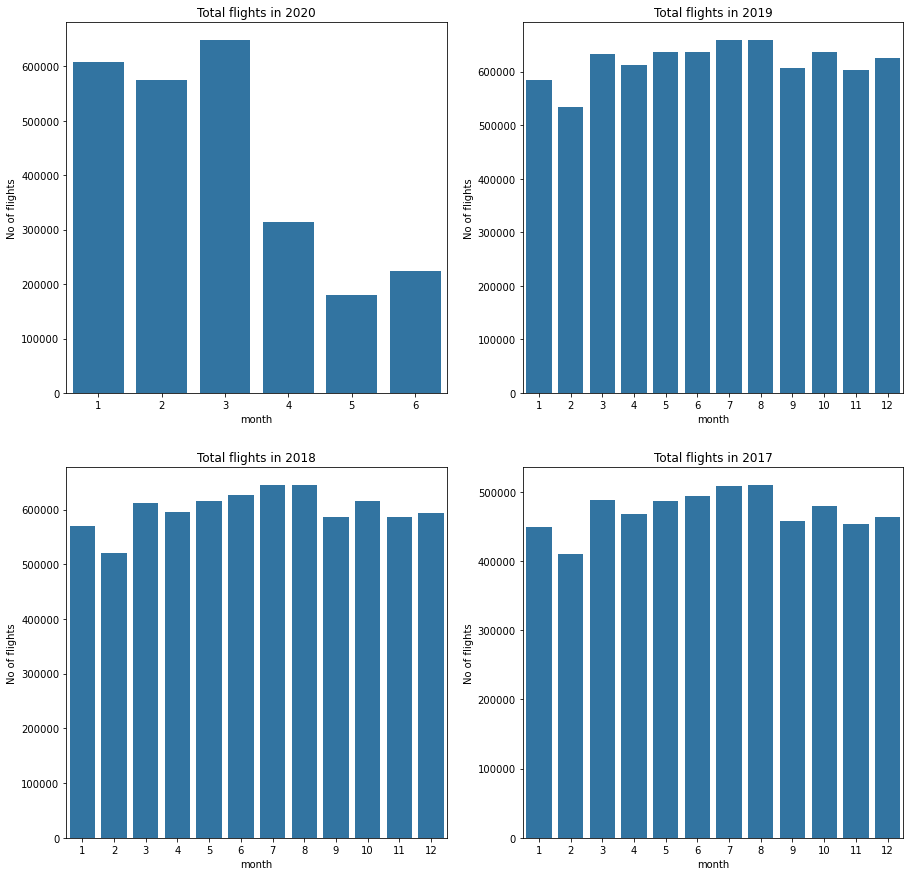

In [5]:
basic_color = sb.color_palette()[0]

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)  # Plot 2020 data
sb.barplot(x =df2020.groupby(['month']).sum().index,  y=df2020.groupby(['month']).sum().arr_flights, color=basic_color)
plt.title('Total flights in 2020')
plt.ylabel('No of flights')

plt.subplot(2,2,2)  # Plot 2019 data
sb.barplot(x =df2019.groupby(['month']).sum().index,  y=df2019.groupby(['month']).sum().arr_flights, color=basic_color)
plt.title('Total flights in 2019')
plt.ylabel('No of flights')

plt.subplot(2,2,3)  # Plot 2018 data
sb.barplot(x =df2018.groupby(['month']).sum().index,  y=df2018.groupby(['month']).sum().arr_flights, color=basic_color)
plt.title('Total flights in 2018')
plt.ylabel('No of flights')

plt.subplot(2,2,4)  # Plot 2017 data
sb.barplot(x =df2017.groupby(['month']).sum().index,  y=df2017.groupby(['month']).sum().arr_flights, color=basic_color)
plt.title('Total flights in 2017')
plt.ylabel('No of flights');

## Carrier Vs Carrier Delay

> We can see from the violin plot that G4 carrier has the lowest mean, and also it has the largest width, which means that most data fall in the low range, and the data is pretty high, and on the other hand WN has the highest mean and very thin width, and this mean it has low flights, So we can consider that WN has low flight numbers and high delay time due to carrier, and the opposite in G4 carrier, So WN must take care about this delay, this could be a reason to have low flight number. 


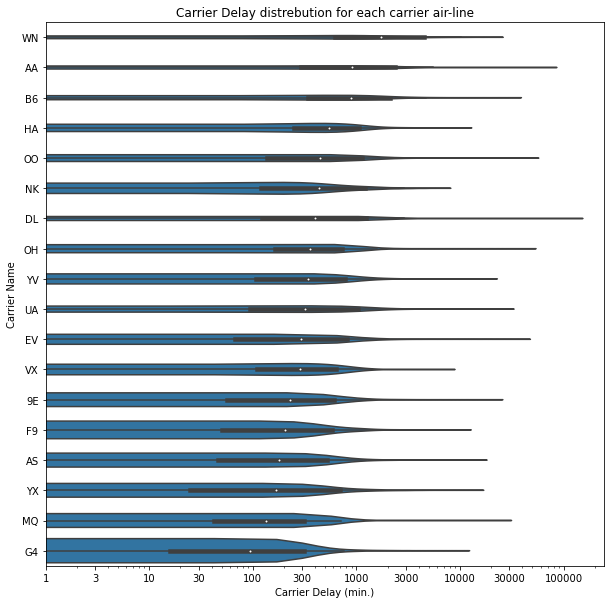

In [6]:
idx = df.groupby(['carrier']).median().sort_values('carrier_delay', ascending = False).index

x_ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]

df.carrier_delay.mean()

plt.figure(figsize = (10,10))
sb.violinplot(data=df, x='carrier_delay', y='carrier', order=idx, color=basic_color)
plt.xscale('log')
plt.xticks(x_ticks,x_ticks) 
plt.title('Carrier Delay distrebution for each carrier air-line')
plt.xlabel('Carrier Delay (min.)')
plt.ylabel('Carrier Name');

## The highest 15 number of taking-off flights from each city

> As we see CA is the most city has arrived flights, then TX, and in the last place was TT, I took the first 15 place to make a small plot because there are 53 city. 

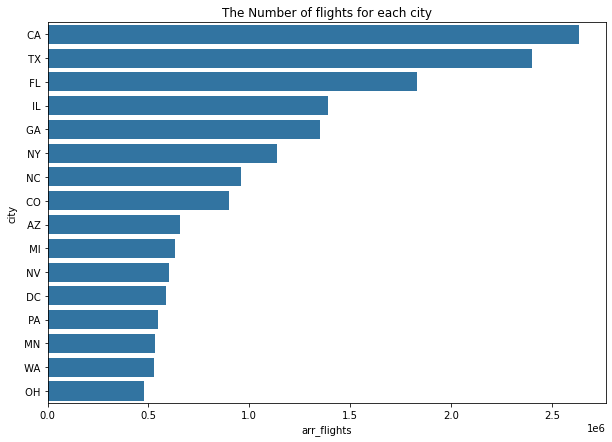

In [7]:
df['city'] = df.airport_name.str.split(',').str[1].str.split(':').str[0]

df1 = df.groupby(['city']).sum().arr_flights.sort_values(ascending=False)[0:16].reset_index()
idx = df1.city

plt.figure(figsize = (10, 7))
plt.title('The Number of flights for each city')
sb.barplot(data = df1, x = 'arr_flights', y = 'city', color = basic_color);

## Heatmap between (year,month and security)

> At (Nov-2017, Dec-2017, and Jun-2019) there were many flights that cancelled or delayed because security reasons, I think there were some terrorist operations or something like that in this months.

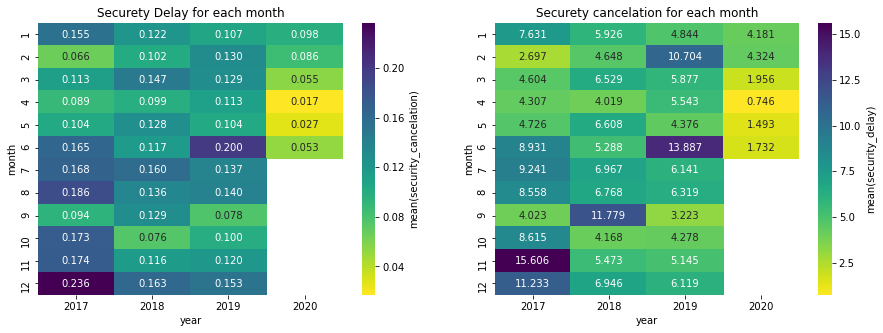

In [8]:
# Plot the flight Cancelled due to security reasons
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
security_ct_mean = df.groupby(['year', 'month']).mean()['security_ct']
security_ct_mean = security_ct_mean.reset_index(name = 'security_ct_avg')
security_ct_means = security_ct_mean.pivot(index = 'month', columns = 'year',
                            values = 'security_ct_avg')

sb.heatmap(security_ct_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(security_cancelation)'},
           cmap = 'viridis_r')
plt.title('Securety Delay for each month')
                                                                     
# Plot the flight delayed due to security reasons
plt.subplot(1,2,2)
security_delay_mean = df.groupby(['year', 'month']).mean()['security_delay']
security_delay_mean = security_delay_mean.reset_index(name = 'security_delay_avg')
security_delay_means = security_delay_mean.pivot(index = 'month', columns = 'year',
                            values = 'security_delay_avg')

sb.heatmap(security_delay_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(security_delay)'},  cmap = 'viridis_r')
plt.title('Securety cancelation for each month');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input --post serve --SlidesExporter.reveal_scroll=True